In [40]:
import warnings
warnings.filterwarnings('ignore')

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
from sklearn.datasets import load_breast_cancer

In [43]:
cancer=load_breast_cancer()

In [44]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [45]:
cancer_df=pd.DataFrame(cancer.data)

In [46]:
cancer_df.columns=cancer.feature_names

In [47]:
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


PCA visualization

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
sc=StandardScaler()

In [50]:
sc.fit(cancer_df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [51]:
scaled_df=sc.transform(cancer_df)

In [52]:
from sklearn.decomposition import PCA

In [53]:
pca=PCA(n_components=5)  #it will return from PC1 to PC5

In [54]:
x_pca=pca.fit_transform(scaled_df)

In [55]:
scaled_df.shape

(569, 30)

In [56]:
x_pca.shape

(569, 5)

In [59]:
x_pca[:,0]   #it is giving the first column that is it is PC1

array([ 9.19283683,  2.3878018 ,  5.73389628,  7.1229532 ,  3.93530207,
        2.38024715,  2.23888331,  2.1432985 ,  3.17492429,  6.35174679,
       -0.81041377,  2.65110048,  8.18503446,  0.34212591,  4.3423792 ,
        4.07565618,  0.23005502,  4.41801092,  4.94870355, -1.23706336,
       -1.57816124, -3.55733637,  4.73321079,  4.20852421,  4.94963207,
        7.09856286,  3.5102626 ,  3.06405389,  4.00726414,  1.71530973,
        6.05944551,  2.9022361 ,  4.55478269,  4.99060272,  2.98534079,
        2.76636916,  1.29619877, -3.7493134 , -0.9980689 ,  0.76526412,
       -2.15095347, -0.09333139,  9.08799968,  0.99045377, -0.29354655,
        5.38094041, -4.58193667,  1.70000689, -2.13644528, -1.567479  ,
       -3.54290556, -3.15781405, -3.45048854,  3.30255095, -0.67461929,
       -2.85815844,  4.64873887,  2.17686288, -3.72145899, -4.13596294,
       -2.38583566, -2.57888325,  4.75911215, -2.31413225,  1.69160792,
        1.81230541, -2.78592476, -3.51864834,  4.33000265, -3.26

In [61]:
x_pca[:,1]  #this is PC2

array([ 1.94858307e+00, -3.76817174e+00, -1.07517380e+00,  1.02755891e+01,
       -1.94807157e+00,  3.94992889e+00, -2.69003128e+00,  2.34024401e+00,
        3.39181295e+00,  7.72717406e+00, -2.65927550e+00,  6.65679259e-02,
        2.70097650e+00, -9.68279261e-01,  4.86108331e+00,  2.97706118e+00,
       -1.56475773e+00,  1.41867034e+00, -4.11433353e+00, -1.88214955e-01,
        5.72808196e-01,  1.66294990e+00,  3.30496373e+00, -5.12836651e+00,
       -1.54375229e+00,  2.01861034e+00,  2.17162512e+00, -1.87655235e+00,
        5.37242160e-01, -1.52370502e+00, -7.57177453e-01,  4.00529551e+00,
        3.37536151e-01, -1.13258891e+00,  7.58423242e-01, -3.54355942e-01,
        9.13196274e-01, -1.41347312e+00, -3.35129292e+00,  8.86243949e-01,
       -1.92399162e+00,  2.26075201e+00,  2.01867310e+00,  9.84930021e-01,
       -1.37099091e-01, -1.34876980e-01,  1.48422032e+00,  2.35227179e+00,
        9.58296080e-02, -1.20843321e+00, -1.28249558e+00, -1.68895859e+00,
       -4.98218714e-01, -

In [63]:
cancer_df['target']=cancer.target

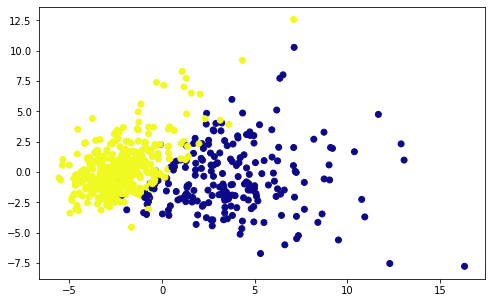

In [65]:
plt.figure(figsize=[8,5])
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer_df['target'],cmap='plasma')

In [67]:
pca.components_     # this are the coefficients like p11,p12,p13.......for PC1 to PC5

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947],
       [-0.00853124,  0.06454991, -0.00931422,  0.02869952, -0.1042919 ,
        -0.07409158,  0.00273384, -0.02556353, -0

In [69]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [74]:
df_comp=pd.DataFrame(pca.components_,columns=cancer.feature_names)

In [81]:
df_comp

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339
2,-0.008531,0.064550,-0.009314,0.028700,-0.104292,-0.074092,0.002734,-0.025564,-0.040240,-0.022574,...,-0.047507,-0.042298,-0.048547,-0.011902,-0.259798,-0.236076,-0.173057,-0.170344,-0.271313,-0.232791
3,0.041409,-0.603050,0.041983,0.053434,0.159383,0.031795,0.019123,0.065336,0.067125,0.048587,...,0.015417,-0.632808,0.013803,0.025895,0.017652,-0.091328,-0.073951,0.006007,-0.036251,-0.077053
4,0.037786,-0.049469,0.037375,0.010331,-0.365089,0.011704,0.086375,-0.043861,-0.305941,-0.044424,...,-0.004407,-0.092883,0.007454,-0.027391,-0.324435,0.121804,0.188519,0.043332,-0.244559,0.094423


In [75]:
pca.explained_variance_

array([13.30499079,  5.7013746 ,  2.82291016,  1.98412752,  1.65163324])

In [78]:
pca.explained_variance_ratio_  ###here 44%variance is explained by PC1 and 18% by PC2 and so on up tp 5% explained by PC 5

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768])

In [79]:
pc=['PC1','PC2','PC3','PC4','PC5']

<BarContainer object of 5 artists>

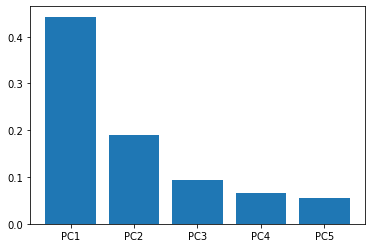

In [80]:
plt.bar(pc,pca.explained_variance_ratio_)

In [82]:
type(x_pca)

numpy.ndarray

In [83]:
x_pca_df=pd.DataFrame(x_pca,columns=pc)

In [90]:
x=x_pca

In [91]:
y=cancer.target

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,train_size=0.7,random_state=42)

In [95]:
import statsmodels.api as sm

In [97]:
x_train_ss=sm.add_constant(x)

In [99]:
lgmod=sm.GLM(y,x_train_ss,family=sm.families.Binomial()).fit()

In [100]:
print(lgmod.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  569
Model:                            GLM   Df Residuals:                      563
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -41.698
Date:                Wed, 18 Sep 2019   Deviance:                       83.397
Time:                        12:59:40   Pearson chi2:                     693.
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4137      0.312      1.326      0.1

In [101]:
y_pred=lgmod.predict(x_train_ss)

In [102]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [105]:
print(' Accuracy Score:\n')
print(accuracy_score(y,y_pred.round()))


 Accuracy Score:

0.9771528998242531


In [ ]:
y_pred=l